# Proyecto. Métodos de clustering para series de tiempo
Por: Federico Salinas Samaniego

## Visualización de distancia euclidiana y DTW

In [1]:
from numpy import array, ndarray, zeros, float64, inf, argmin
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplcatppuccin

mpl.style.use("mocha")

In [2]:
class_dataseries = dict()

with open("../StarLightCurves/StarLightCurves_TRAIN.txt", "r") as input_data:
    for n, line in enumerate(input_data.readlines()[:2]):
        line_split = line.split("  ")[1:]
        class_series, data_series = int(line_split[0][1]), array([float(val_string) for val_string in line_split[1:]])

        mean_series = data_series.mean()
        std_series = data_series.std()
        data_series = (data_series - mean_series)/std_series
        class_dataseries[n] = (class_series, data_series)

series_1 = list(class_dataseries.values())[0][1]
series_2 = list(class_dataseries.values())[1][1]
print(series_1)
print(series_2)

[0.53756548 0.53136246 0.52876119 ... 0.52666016 0.51975679 0.51165283]
[0.58868511 0.59418778 0.59939029 ... 0.30104585 0.31375201 0.32705844]


### Euclidiana

In [3]:
def Euclidiana(Xi:ndarray, Xj:ndarray):
    return ( ((Xi - Xj) ** 2.0).sum() )**0.5

### DTW

In [4]:
def local_dist(x, y):
    return abs(x - y)

def DTW(Xi:ndarray, Xj:ndarray, q:float = 2.0):
    length_Xi = Xi.size
    length_Xj = Xj.size
    R = zeros((length_Xi, length_Xj), dtype = float64)
    R[0,0] = local_dist(Xi[0], Xj[0]) ** q
    
    for i in range(1, length_Xi):
        R[i, 0] = R[i-1, 0] + local_dist(Xi[i], Xj[0]) ** q
    for j in range(1, length_Xj):
        R[0, j] = R[0, j-1] + local_dist(Xi[0], Xj[j]) ** q
    
    for i in range(1, length_Xi):
        for j in range(1, length_Xj):
            cost = local_dist(Xi[i], Xj[j]) ** q
            R[i, j] = cost + min(R[i-1, j], R[i, j-1], R[i-1, j-1])

    i_index, j_index = array(R.shape) - 1
    path = [(i, j)]

    while (i_index > 0 or j_index > 0):
        direction = argmin((R[i_index, j_index-1],
                               R[i_index-1, j_index],
                               R[i_index-1, j_index-1]))

        if direction == 0:
            j_index -= 1
        elif direction == 1:
            i_index -= 1
        else:
            i_index -= 1
            j_index -= 1

        path.append((i_index, j_index))

    path.reverse()
    return path, R[length_Xi - 1, length_Xj - 1] ** (1.0/q)

### Comparación

In [5]:
DistEuclidiana = Euclidiana(series_1, series_2)
pathDTW, DistDTW = DTW(series_1, series_2, q = 2.0)
print(DistEuclidiana, DistDTW)

9.421352307687126 2.786660119589886


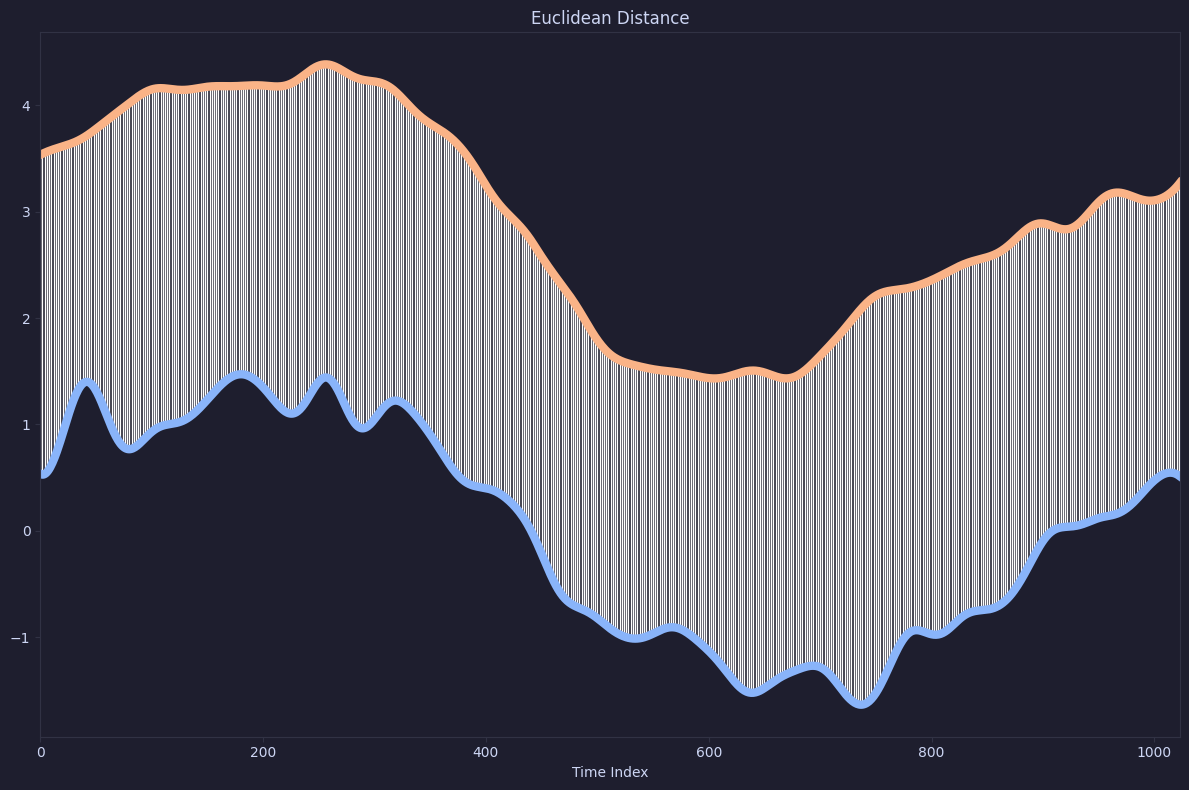

In [6]:
Figure_Euclid = plt.figure(1, figsize=(12, 8))
Subplot_Euclid = Figure_Euclid.add_subplot(111)

Subplot_Euclid.plot(series_1, linewidth = 6.0)
Subplot_Euclid.plot(series_2 + 2.0*series_1.max(), linewidth = 6.0)
Subplot_Euclid.set_xlabel("Time Index")
Subplot_Euclid.set_title("Euclidean Distance")
Subplot_Euclid.set_xlim(0, 1023)

for i in range(0, 1024, 2):
    Subplot_Euclid.plot([i, i], [series_1[i], series_2[i] + 2.0*series_1.max()], color = "white", linewidth = 1, zorder = 0)

Figure_Euclid.tight_layout()

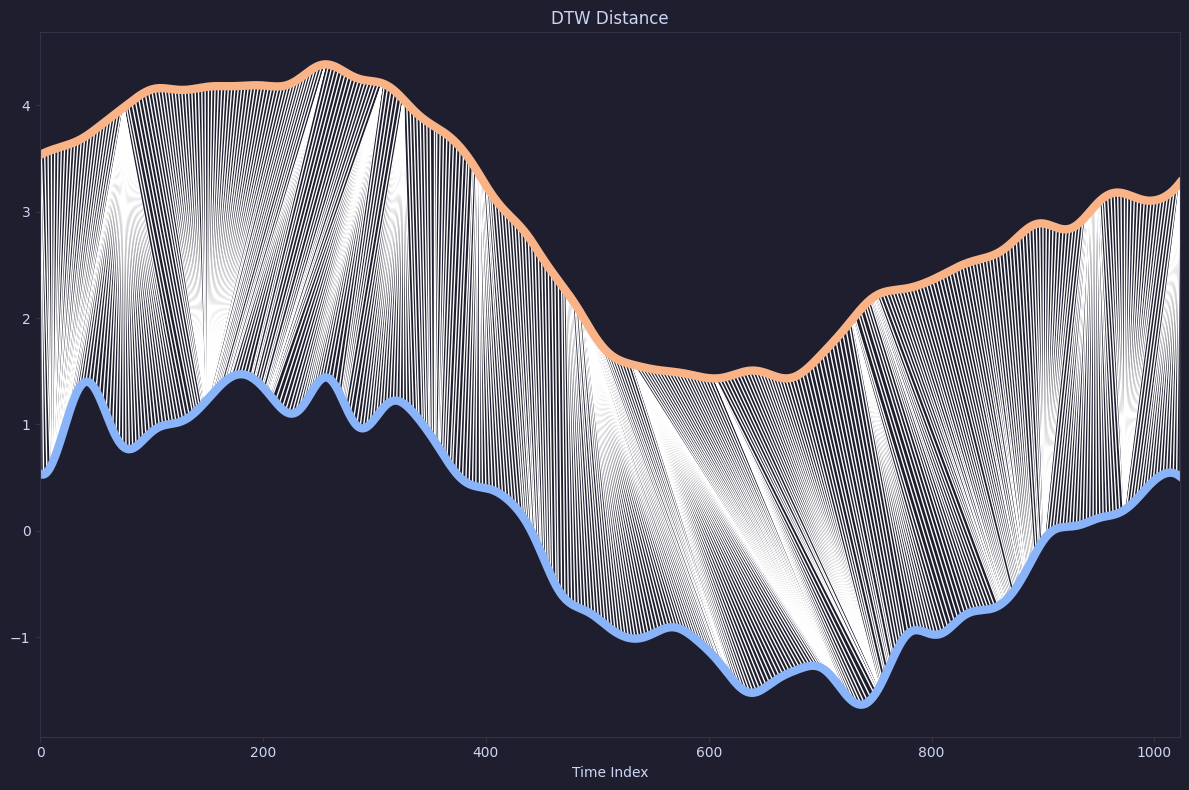

In [7]:
Figure_DTW = plt.figure(2, figsize=(12, 8))
Subplot_DTW = Figure_DTW.add_subplot(111)

Subplot_DTW.plot(series_1, linewidth = 6.0)
Subplot_DTW.plot(series_2 + 2.0*series_1.max(), linewidth = 6.0)
Subplot_DTW.set_xlabel("Time Index")
Subplot_DTW.set_title("DTW Distance")
Subplot_DTW.set_xlim(0, 1023)

for i,ip in pathDTW[::3]:
    Subplot_DTW.plot([i,ip], [series_1[i], series_2[ip] + 2.0*series_1.max()], color = "white", linewidth = 1, zorder = 0)

Figure_DTW.tight_layout()